In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR

In [233]:
df = pd.read_csv("https://s3-us-west-1.amazonaws.com/bmedsfinalproject/winemag-data-130k-v2.csv")
df.dropna(subset = ['price'], inplace = True)

In [252]:
print(df['country'].nunique())
print(df['variety'].nunique())
print(df['designation'].nunique())
print(df['winery'].nunique())


42
697
35776
15855


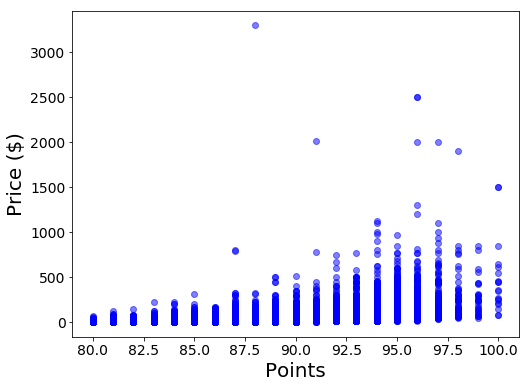

In [234]:
plt.figure(figsize = (8,6))
plt.scatter(df['points'],df['price'], color = 'blue', alpha = 0.5)
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/all.png', dpi = 300 )

In [113]:
# predicting individual price with points
model = LinearRegression()
X = df['points'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
print(f'Training data model fitting score (R square): {model.score(X_train,y_train)}')
print(f'Testing data model fitting score (R square): {model.score(X_test,y_test)}')

Training data model fitting score (R square): 0.1656668746109453
Testing data model fitting score (R square): 0.20192641848518533


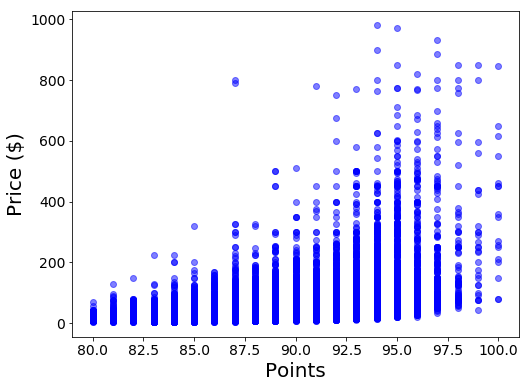

In [235]:
df1000 = df[df['price']<1000]
plt.figure(figsize = (8,6))
plt.scatter(df1000['points'],df1000['price'], color = 'blue', alpha = 0.5)
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/filtered.png', dpi = 300)

In [22]:
# predicting individual price with points
model = LinearRegression()
X = df1000['points'].values.reshape(-1,1)
y = df1000['price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
print(f'Training data model fitting score (R square): {model.score(X_train,y_train)}')
print(f'Testing data model fitting score (R square): {model.score(X_test,y_test)}')

Training data model fitting score (R square): 0.21471042888443537
Testing data model fitting score (R square): 0.22687627224250062


Whole dataset model fitting score: 0.8071536879326981
Training data model fiting score (R square): 0.794477084845026
Testing data model fitting score (R square): 0.7610826384805304


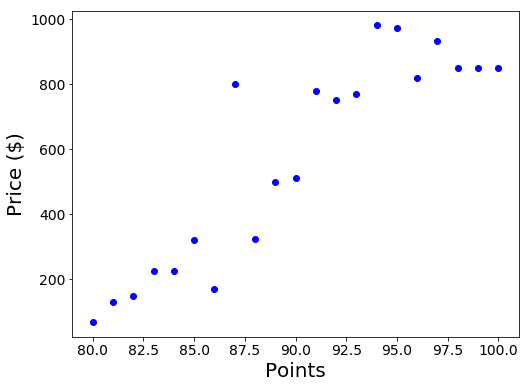

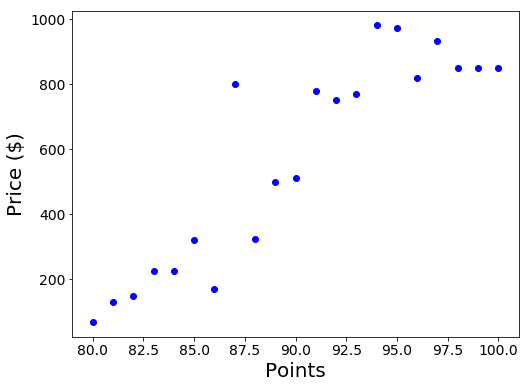

In [245]:
# predicting maximal price with points
unique_points = df1000['points'].unique()
plt.figure(figsize = (8,6))
max_price = df1000.groupby('points')['price'].max()
plt.scatter(max_price.index, max_price.values, color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
# print(max_price)

model = LinearRegression()
X = max_price.index.values.reshape(-1,1)
y = max_price.values.reshape(-1,1)
model.fit(X,y)
print(f'Whole dataset model fitting score: {model.score(X,y)}')
plt.figure(figsize = (8,6))
plt.scatter(X, y, label='data', color='blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/max.png', dpi = 300)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
print(f'Training data model fiting score (R square): {model.score(X_train,y_train)}')
print(f'Testing data model fitting score (R square): {model.score(X_test,y_test)}')



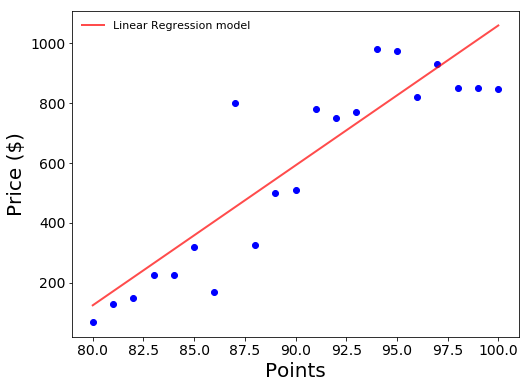

In [246]:
plt.figure(figsize = (8,6))
plt.scatter(X, y, color='blue')
x_values = [min(X), max(X)]
y_values = [min(model.predict(X)), max(model.predict(X))]
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 11, frameon = False)
plt.savefig('Marina_Figures/max_regression.png')

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


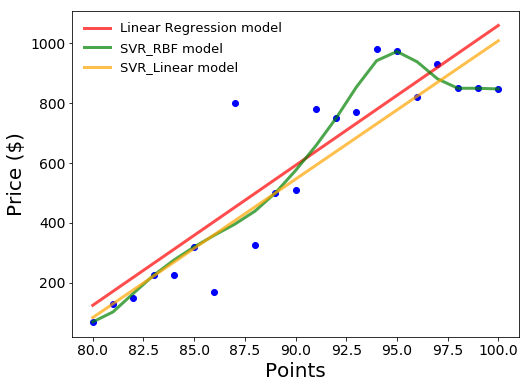

0.8778537497780451
0.8742555097211364
0.8493086863233298
0.8005419211623248
0.7868610620164945
0.7738478864138948


In [249]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
# y_poly = svr_poly.fit(X, y).predict(X)
# Look at the results
lw = 3
plt.figure(figsize = (8,6))
plt.scatter(X, y, color='blue')
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.plot(X, y_rbf, color='green', lw=lw, label='SVR_RBF model', alpha = 0.7)
plt.plot(X, y_lin, color='orange', lw=lw, label='SVR_Linear model', alpha = 0.7)
# plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 13, frameon = False)
plt.savefig('Marina_Figures/max_SVR.png', dpi = 300)
plt.show()

svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
print(svr_rbf.score(X,y))
print(svr_rbf.score(X_train,y_train))
print(svr_rbf.score(X_test,y_test))

print(svr_lin.score(X,y))
print(svr_lin.score(X_train,y_train))
print(svr_lin.score(X_test,y_test))


model fit score: 0.6960788207682962
train data model fit score: 0.7130798181478271
test data model fit score: 0.6395638902368822


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


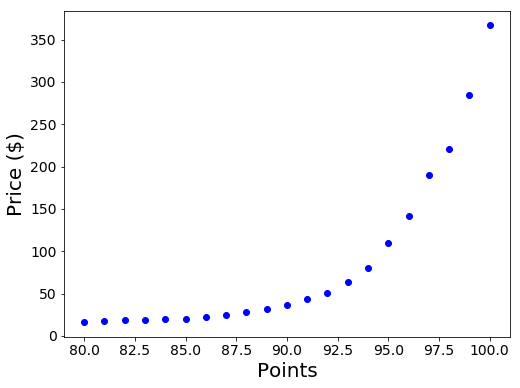

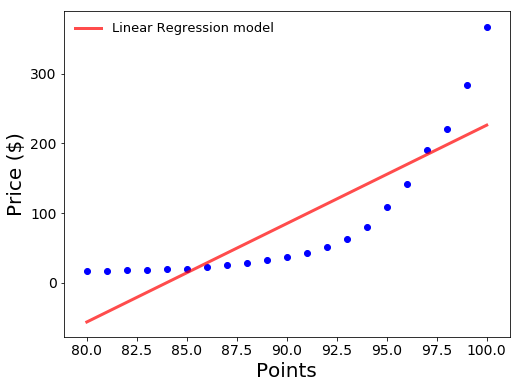

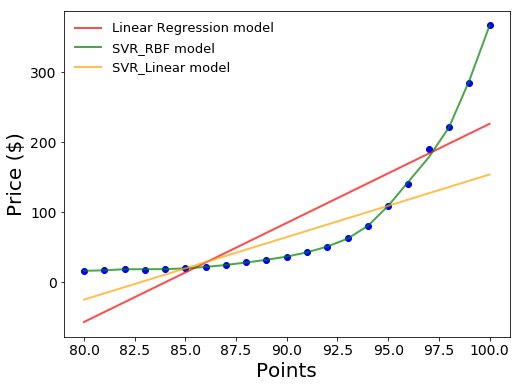

0.9981535045413485
0.9981524680407516
0.998150341015026
0.6611748153308628
0.6663984331865269
0.6456745949642044


In [250]:
# predicting mean price
unique_points = df1000['points'].unique()
mean_price = df1000.groupby('points')['price'].mean()
plt.figure(figsize = (8,6))
plt.scatter(mean_price.index, mean_price.values, color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/mean.png', dpi = 300)

# print(mean_price)
model = LinearRegression()
X = mean_price.index.values.reshape(-1,1)
y = mean_price.values.reshape(-1,1)
model.fit(X,y)
print(f'model fit score: {model.score(X,y)}')

X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
print(f'train data model fit score: {model.score(X_train,y_train)}')
print(f'test data model fit score: {model.score(X_test,y_test)}')
x_values = [min(X), max(X)]
y_values = [min(model.predict(X)), max(model.predict(X))]
plt.figure(figsize = (8,6))
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.scatter(mean_price.index, mean_price.values, color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 13, frameon = False)
plt.savefig('Marina_Figures/mean_regression.png', dpi = 300)

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
# y_poly = svr_poly.fit(X, y).predict(X)
# Look at the results
lw = 2
plt.figure(figsize=(8,6))
plt.scatter(X, y, color = 'blue')
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.plot(X, y_rbf, color='green', lw=lw, label='SVR_RBF model', alpha = 0.7)
plt.plot(X, y_lin, color='orange', lw=lw, label='SVR_Linear model', alpha = 0.7)
# plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 13, frameon = False)
plt.savefig('Marina_Figures/mean_SVR.png', dpi = 300)
plt.show()
svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
print(svr_rbf.score(X,y))
print(svr_rbf.score(X_train,y_train))
print(svr_rbf.score(X_test,y_test))

print(svr_lin.score(X,y))
print(svr_lin.score(X_train,y_train))
print(svr_lin.score(X_test,y_test))


model fit score: 0.6004929985216862
train data model fit score: 0.619878014435745
test data model fit score: 0.11899302013762836


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


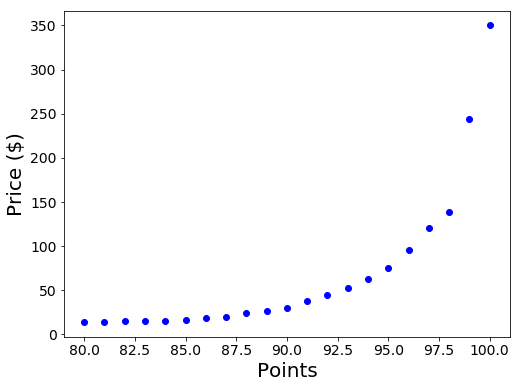

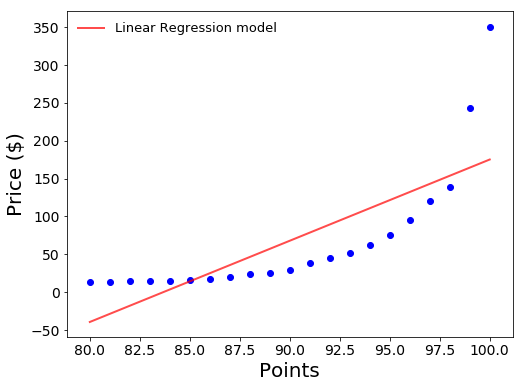

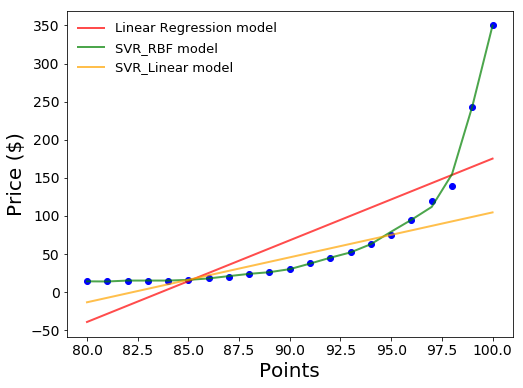

0.9977556803102363
0.9999974492345219
0.9746674874391807
0.3169721268307504
0.29293209229972716
0.5632622148361606


In [251]:
# predicting median price
unique_points = df1000['points'].unique()
median_price = df1000.groupby('points')['price'].median()
plt.figure(figsize = (8,6))
plt.scatter(median_price.index, median_price.values, color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/median.png', dpi = 300)
# print(median_price)


model = LinearRegression()
X = median_price.index.values.reshape(-1,1)
y = median_price.values.reshape(-1,1)
model.fit(X,y)
print(f'model fit score: {model.score(X,y)}')
x_values = [min(X), max(X)]
y_values = [min(model.predict(X)), max(model.predict(X))]
plt.figure(figsize = (8,6))
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.scatter(median_price.index, median_price.values, color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 13, frameon = False)
plt.savefig('Marina_Figures/median_regression.png', dpi = 300)


X_train, X_test, y_train, y_test = train_test_split(X,y)
model.fit(X_train,y_train)
print(f'train data model fit score: {model.score(X_train,y_train)}')
print(f'test data model fit score: {model.score(X_test,y_test)}')


# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
# y_poly = svr_poly.fit(X, y).predict(X)
# Look at the results
lw = 2
plt.figure(figsize=(8,6))
plt.scatter(X, y, color = 'blue')
plt.plot(x_values,y_values, color = 'red', lw = lw, label = 'Linear Regression model', alpha = 0.7)
plt.plot(X, y_rbf, color='green', lw=lw, label='SVR_RBF model', alpha = 0.7)
plt.plot(X, y_lin, color='orange', lw=lw, label='SVR_Linear model', alpha = 0.7)
# plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 13, frameon = False)
plt.savefig('Marina_Figures/median_SVR.png', dpi = 300)
plt.show()

svr_rbf.fit(X_train,y_train)
svr_lin.fit(X_train,y_train)
print(svr_rbf.score(X,y))
print(svr_rbf.score(X_train,y_train))
print(svr_rbf.score(X_test,y_test))

print(svr_lin.score(X,y))
print(svr_lin.score(X_train,y_train))
print(svr_lin.score(X_test,y_test))

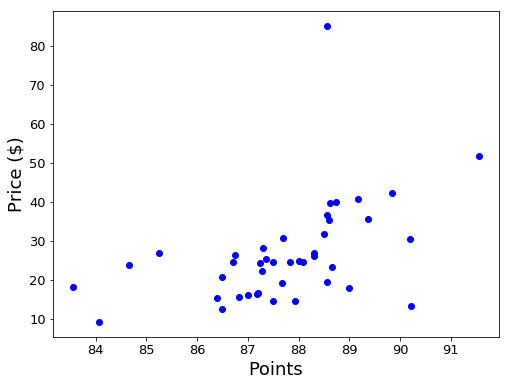

In [241]:
plt.figure(figsize = (8,6))
by_country = df1000.groupby('country')[['price','points']].mean()
plt.scatter(by_country['points'],by_country['price'], color = 'blue')
plt.xlabel('Points', fontsize = 18)
plt.ylabel('Price ($)', fontsize = 18)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.savefig('Marina_Figures/by_country.png', dpi = 300)

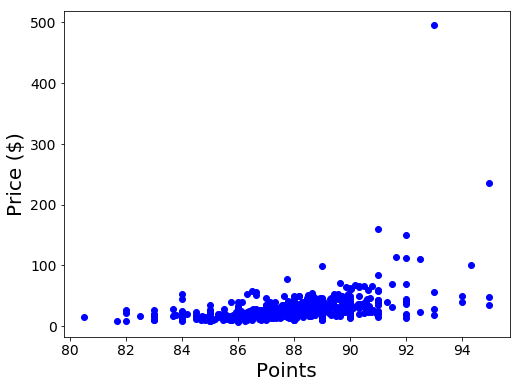

In [242]:
plt.figure(figsize = (8,6))
by_country = df1000.groupby('variety')[['price','points']].mean()
plt.scatter(by_country['points'],by_country['price'], color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('Marina_Figures/by_variety.png', dpi = 300)

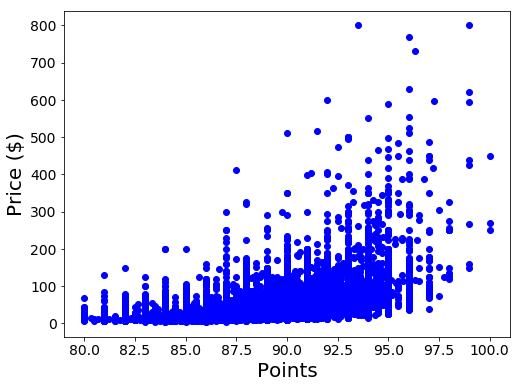

In [206]:
plt.figure(figsize = (8,6))
by_country = df1000.groupby('designation')[['price','points']].mean()
plt.scatter(by_country['points'],by_country['price'], color = 'blue')
plt.xlabel('Points', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 20)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.savefig('by_designation.png', dpi = 300)

In [120]:
noble18 = ['Malbec', 'Cabernet Sauvignon', 'Pinot Grigio', 'Pinot Gris', 'Sauvignon Blanc',
           'Gewürztraminer','Syrah,Merlot','Riesling,Chardonnay','Moscato','Chenin Blanc','Sémillon',
           'Grenache','Nebbiolo','Viognier', 'Tempranillo', 'Pinot Noir','Sangiovese']
df['noble']=df['variety'].map(lambda x: x in noble18)
noble = df[df['noble']==True]
non_noble = df[df['noble']==False]

In [130]:
model = LinearRegression()
countries = noble['country'].unique()
results = []
shapes = []
for country in countries:
    noble1 = noble[(noble['price']< 100) & (noble['country']== country)]
    data =noble1[['points',  'variety', 'designation']]
    X = pd.get_dummies(data)
    y = noble1['price'].values.reshape(-1,1)
    print(country)
    try:
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        X_train_shape = X_train.shape
        X_test_shape = X_test.shape
        y_train_shape = y_train.shape
        y_test_shape = y_test.shape
        shape = [X_train_shape, X_test_shape, y_train_shape, y_test_shape]
        shape_d = {country: shape}
        shapes.append(shape_d)
        
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test,y_test)
        model.fit(X,y)
        all_score = model.score(X,y)
        print('-'*80)
        result = [train_score, test_score, all_score]
        result_d = {country:result}
        results.append(result_d)
    except ValueError:
        print('error')

US
--------------------------------------------------------------------------------
France
--------------------------------------------------------------------------------
Germany
--------------------------------------------------------------------------------
Argentina
--------------------------------------------------------------------------------
Italy
--------------------------------------------------------------------------------
Chile
--------------------------------------------------------------------------------
South Africa
--------------------------------------------------------------------------------
New Zealand
--------------------------------------------------------------------------------
Australia
--------------------------------------------------------------------------------
Mexico
--------------------------------------------------------------------------------
Spain
--------------------------------------------------------------------------------
Austria
-------------

In [131]:
print(results)
print(shapes)

[{'US': [0.7456113373849107, -8.543624595732634e+19, 0.7431264599623993]}, {'France': [0.8329244477773927, -2.305935508767326e+21, 0.8215458075214651]}, {'Germany': [0.8830031177850781, -1.5248709575629062e+22, 0.7352754940571081]}, {'Argentina': [0.8331716181779711, -9.752554090238559e+20, 0.8429803729073779]}, {'Italy': [0.7456826119073676, -1.4298679120852023e+21, 0.7334613863149518]}, {'Chile': [0.8749436466293333, -5.905855743244552e+21, 0.8719040188355481]}, {'South Africa': [0.8000398106629534, -7.384295988504032e+23, 0.7935551863884169]}, {'New Zealand': [0.8269671253118455, -4.1682503038914417e+21, 0.8160446315311118]}, {'Australia': [0.8152394067705443, -1.416086916785621e+20, 0.7888856496490437]}, {'Mexico': [0.9092192842093219, -13.082685911451563, 0.8214843578792315]}, {'Spain': [0.7979604804898562, -1.0881409378237414e+22, 0.7788587481763986]}, {'Austria': [0.860428628042141, -1.533989805839728e+24, 0.870108805077741]}, {'Romania': [0.9996472374663917, -0.0789488638373461

In [222]:
countries = [list(x.keys())[0] for x in results]
trainScores = [list(x.values())[0][0] for x in results]
testScores = [list(x.values())[0][1] for x in results]
allScores = [list(x.values())[0][2] for x in results]
print(countries)
print(trainScores)
print(testScores)
print(allScores)

['US', 'France', 'Germany', 'Argentina', 'Italy', 'Chile', 'South Africa', 'New Zealand', 'Australia', 'Mexico', 'Spain', 'Austria', 'Romania', 'Israel', 'Portugal', 'Slovenia', 'Canada', 'Czech Republic', 'Greece', 'Turkey', 'Bulgaria', 'Croatia', 'Uruguay', 'Peru', 'Moldova', 'Brazil', 'England', 'India', 'Macedonia', 'Hungary', 'Morocco', 'US', 'France', 'Germany', 'Argentina', 'Italy', 'Chile', 'South Africa', 'New Zealand', 'Australia', 'Spain', 'Switzerland']
[0.7456113373849107, 0.8329244477773927, 0.8830031177850781, 0.8331716181779711, 0.7456826119073676, 0.8749436466293333, 0.8000398106629534, 0.8269671253118455, 0.8152394067705443, 0.9092192842093219, 0.7979604804898562, 0.860428628042141, 0.9996472374663917, 0.7780777200468867, 0.7754141607776183, 0.938364445148827, 0.9733077160652592, 1.0, 0.9930394431554525, 1.0, 0.9565005486497864, 1.0, 1.0, 1.0, 0.999620608843766, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6226271462704488, 0.3506480188754275, 1.0, 0.9086636908103298, 0.6837538626

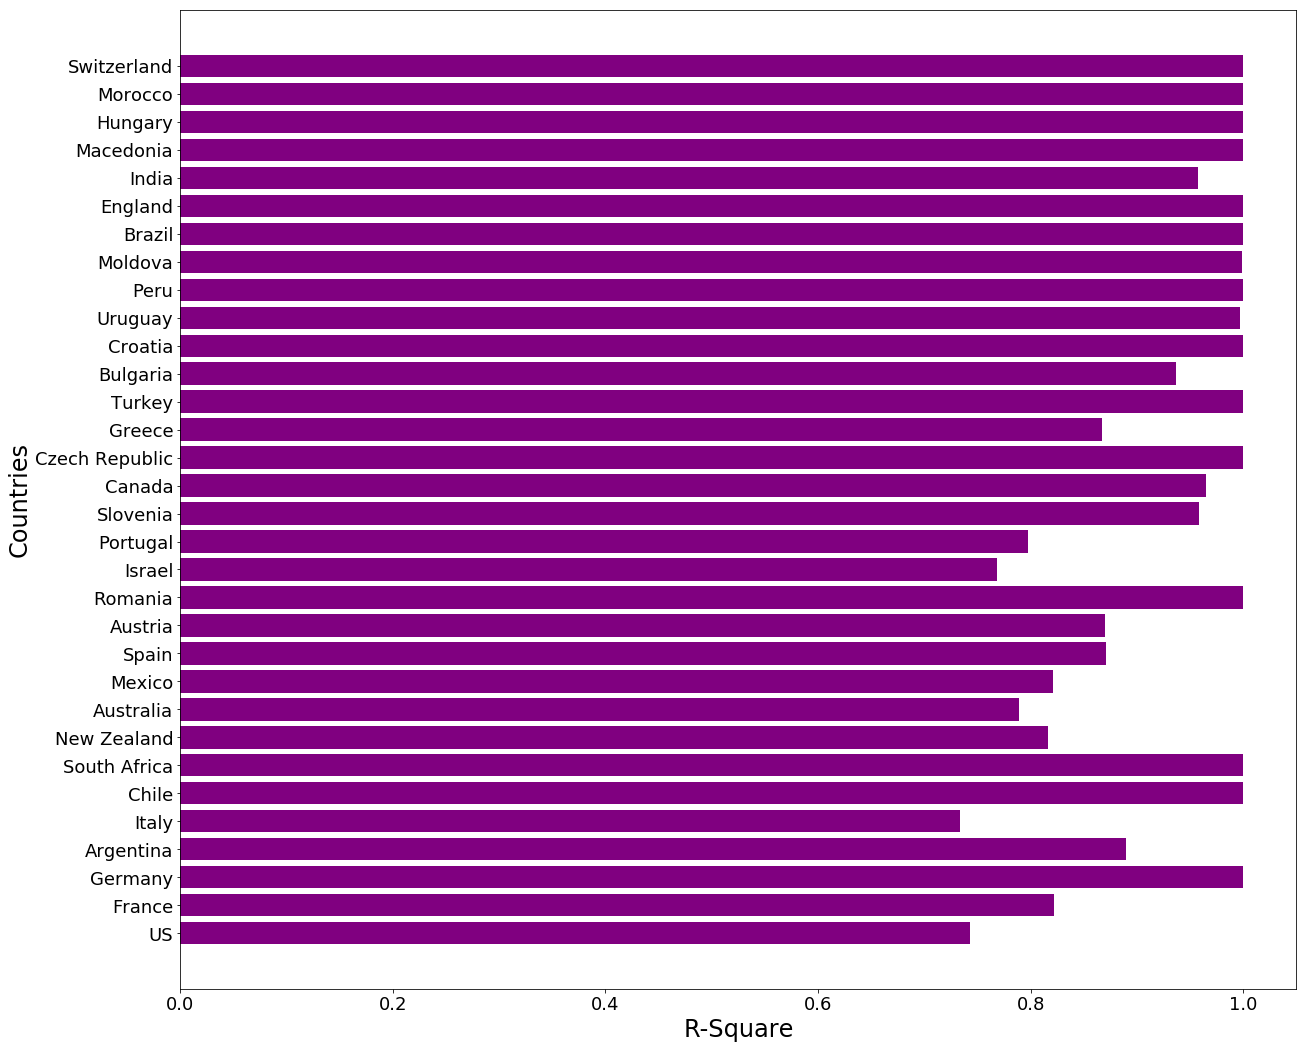

In [243]:
plt.figure(figsize=(20,18))
# plt.bar(countries, trainScores, label='train')
# plt.bar(countries, testScores, label='test')
plt.barh(countries, allScores, label='all', color = 'purple')
plt.xlabel('R-Square', fontsize = 24)
plt.ylabel('Countries', fontsize = 24)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('Marina_Figures/multiFactor_prediction.png', dpi = 300)

In [218]:
model = LinearRegression()
countries = noble['country'].unique()
results2 = []
shapes2 = []
for country in countries:
    noble1 = noble[(noble['price'] >= 100) & (noble['country']== country)]
    data =noble1[['points',  'variety', 'designation']]
    X = pd.get_dummies(data)
    y = noble1['price'].values.reshape(-1,1)
    print(country)
    try:
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        X_train_shape = X_train.shape
        X_test_shape = X_test.shape
        y_train_shape = y_train.shape
        y_test_shape = y_test.shape
        shape2 = [X_train_shape, X_test_shape, y_train_shape, y_test_shape]
        shape_d2 = {country: shape2}
        shapes2.append(shape_d2)
        
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test,y_test)
        model.fit(X,y)
        all_score = model.score(X,y)
        print('-'*80)
        result2 = [train_score, test_score, all_score]
        result_d2 = {country:result2}
        results2.append(result_d2)
    except ValueError:
        print('error')
        

US
--------------------------------------------------------------------------------
France
--------------------------------------------------------------------------------
Germany
--------------------------------------------------------------------------------
Argentina
--------------------------------------------------------------------------------
Italy
--------------------------------------------------------------------------------
Chile
--------------------------------------------------------------------------------
South Africa
--------------------------------------------------------------------------------
New Zealand
--------------------------------------------------------------------------------
Australia
--------------------------------------------------------------------------------
Mexico
error
Spain
--------------------------------------------------------------------------------
Austria
error
Romania
error
Israel
error
Portugal
error
Slovenia
error
Canada
error
Czech Republ

In [212]:
countries2 = [list(x.keys())[0] for x in results2]
trainScores2 = [list(x.values())[0][0] for x in results2]
testScores2 = [list(x.values())[0][1] for x in results2]
allScores2 = [list(x.values())[0][2] for x in results2]
print(countries2)
print(trainScores2)
print(testScores2)
print(allScores2)

['US', 'France', 'Germany', 'Argentina', 'Italy', 'Chile', 'South Africa', 'New Zealand', 'Australia', 'Spain', 'Switzerland']
[0.607541803582156, 0.346163273160608, 1.0, 0.9498995423208533, 0.5099992901616379, 1.0, 1.0, 0.5862068965517241, 1.0, 0.856313489232438, 1.0]
[-3.100857761857028e+21, -4.867233972550262e+23, 0.0, -1.9478905322215176e+23, -1.1345623306069095e+23, 0.0777142857142844, 0.0, 0.017237849606908884, -57.96549897929035, 0.28759590126193946, 1.0]
[0.6305681963705652, 0.2962415461465733, 1.0, 0.8895118024960444, 0.5802618710903427, 0.9999405779781987, 1.0, 0.5877616747181965, 0.6961422216460179, 0.870892069546654, 1.0]


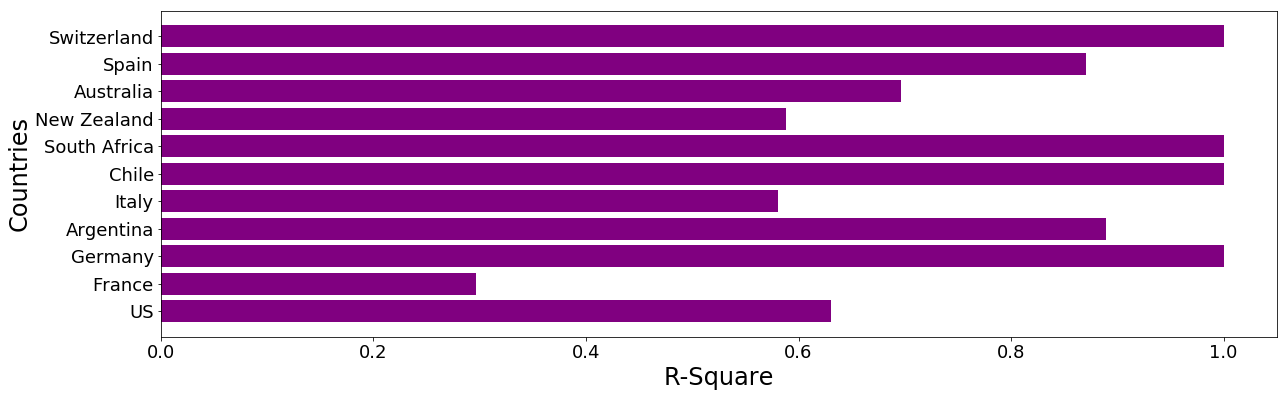

In [244]:
plt.figure(figsize=(20,6))
# plt.bar(countries, trainScores, label='train')
# plt.bar(countries, testScores, label='test')
plt.barh(countries2, allScores2, label='all', color = 'purple')
plt.xlabel('R-Square', fontsize = 24)
plt.ylabel('Countries', fontsize = 24)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.savefig('Marina_Figures/multiFactor(>=100)_prediction.png', dpi = 300)